# พลอตแผนที่สถานีฝนในไทยและแม่น้ำวังทอง

import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon

from matplotlib_scalebar.scalebar import ScaleBar

In [3]:
df = pd.read_csv('../0data/station_metadata_haii_geographic.csv')
df.head()

,code,name,lat,long,tambon,amphoe,province,basin,region,station_type
0,KSKP,อบต.กำแพงแสน,14.003264,99.980928,กำแพงแสน,กำแพงแสน,นครปฐม,แม่น้ำท่าจีน,ภาคกลาง,R
1,TTWY,ทม.วังน้ำเย็น,13.501094,102.180230,วังน้ำเย็น,วังน้ำเย็น,สระแก้ว,แม่น้ำปราจีนบุรี,ภาคกลาง,R
2,KOSB,รพสต.ท่าข้าม,13.627654,102.574842,ท่าข้าม,อรัญประเทศ,สระแก้ว,โตนเลสาป,ภาคกลาง,R
3,BDCP,อบต.ด่านชุมพล,12.444714,102.630067,ด่านชุมพล,บ่อไร่,ตราด,ชายฝั่งทะเลตะวันออก,ภาคกลาง,R
4,MEWG,อบต.บ้านกาด,18.603893,98.798470,บ้านกาด,แม่วาง,เชียงใหม่,แม่น้ำปิง,ภาคเหนือ,R


## แปลงตำแหน่งสถานีวัดน้ำให้เป็น geopandas dataframe

In [4]:
crs = {'init':'EPSG:4326'}
geometry = [Point(xy) for xy in zip(df['long'], df['lat'])]
geo_df_st = gpd.GeoDataFrame(df, 
                          crs = crs, 
                          geometry = geometry)

C:\Users\Admin\anaconda3\envs\ml_dl_n1\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [5]:
geo_df_st.head()

,code,name,lat,long,tambon,amphoe,province,basin,region,station_type,geometry
0,KSKP,อบต.กำแพงแสน,14.003264,99.980928,กำแพงแสน,กำแพงแสน,นครปฐม,แม่น้ำท่าจีน,ภาคกลาง,R,POINT (99.98093 14.00326)
1,TTWY,ทม.วังน้ำเย็น,13.501094,102.180230,วังน้ำเย็น,วังน้ำเย็น,สระแก้ว,แม่น้ำปราจีนบุรี,ภาคกลาง,R,POINT (102.18023 13.50109)
2,KOSB,รพสต.ท่าข้าม,13.627654,102.574842,ท่าข้าม,อรัญประเทศ,สระแก้ว,โตนเลสาป,ภาคกลาง,R,POINT (102.57484 13.62765)
3,BDCP,อบต.ด่านชุมพล,12.444714,102.630067,ด่านชุมพล,บ่อไร่,ตราด,ชายฝั่งทะเลตะวันออก,ภาคกลาง,R,POINT (102.63007 12.44471)
4,MEWG,อบต.บ้านกาด,18.603893,98.798470,บ้านกาด,แม่วาง,เชียงใหม่,แม่น้ำปิง,ภาคเหนือ,R,POINT (98.79847 18.60389)


## อ่านขอบเขตลุ่มน้ำ แสดงแผนที่

In [7]:
basin_map = gpd.read_file('../0data/0GIS/1basin_th/MainBasin_ONWR_Law_WGS84.shp',encoding="TIS-620")
basin_map.head()

,MB_CODE,MBASIN_T,MBASIN_E,AREA_SQKM,geometry
0,01,สาละวิน,Salawin,19101.550019,"MULTIPOLYGON (((427015.307 2117880.732, 427015..."
1,02,โขงเหนือ,North Khong,17432.583752,"POLYGON ((492274.691 2185816.923, 492298.497 2..."
2,03,โขงตะวันออกเฉียงเหนือ,Northeast Khong,47165.078898,"MULTIPOLYGON (((1202723.451 1695889.957, 12026..."
3,04,ชี,Chi,49269.589431,"POLYGON ((1066959.970 1808982.947, 1066925.717..."
4,05,มูล,Mun,70947.717673,"POLYGON ((1199462.673 1703888.438, 1199449.364..."


<AxesSubplot: >

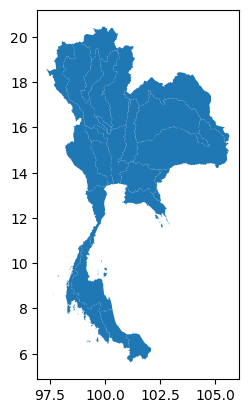

In [8]:
basin_map.to_crs(epsg=4326).plot()

## แสดงแผนที่ลุ่มน้ำ กับ ตำแหน่งสถานีวัดน้ำฝน

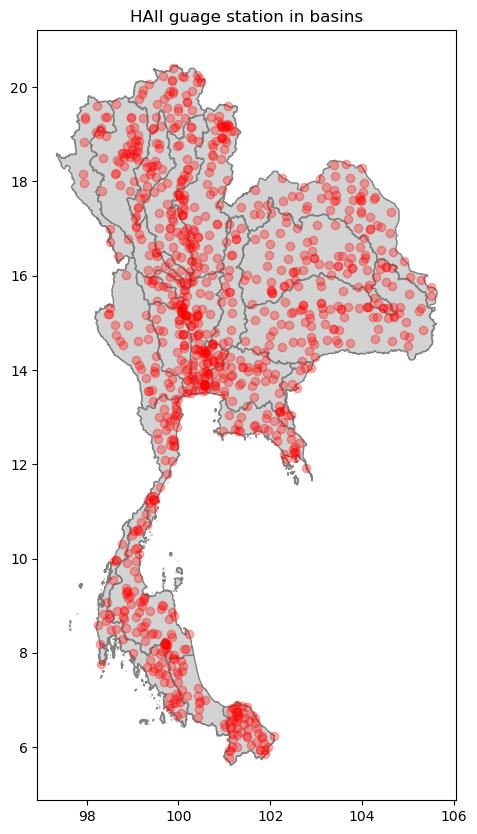

In [10]:
fig, ax = plt.subplots(figsize = (10,10))
basin_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey', edgecolor='grey', linewidth=1)
geo_df_st.plot(ax=ax,  color='red', alpha = .3 )
ax.set_title('HAII guage station in basins')
plt.savefig('../2results/map_gauge_haii_basins.jpg')

## อ่านลุ่มน้ำวังทองมา และพลอตแผนที่ลุ่มวังทอง

In [13]:
wt_basin = gpd.read_file('../3GIS_results/poly_wangthong_wgs84.shp')
wt_basin.head()

,SB_CODE,SB_NAME_T,MB_CODE,MBASIN_T,MBASIN_E,AREA_SQKM,geometry
0,0922,แม่น้ำวังทอง,09,น่าน,Nan,2987.290986,"POLYGON ((100.32635 16.51856, 100.32642 16.519..."


Text(0.5, 1.0, 'HAII guage station in basins')

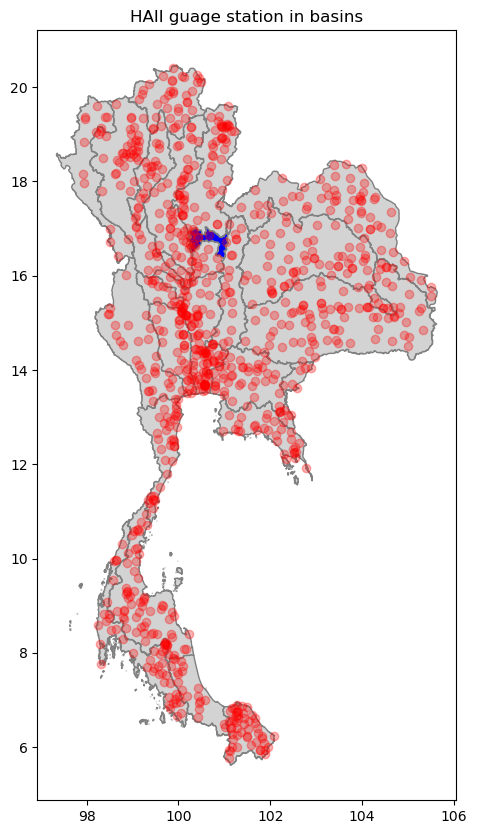

In [15]:
fig, ax = plt.subplots(figsize = (10,10))
basin_map.to_crs(epsg=4326).plot(ax=ax, color='lightgrey', edgecolor='grey', linewidth=1)
wt_basin.to_crs(epsg=4326).plot(ax=ax, color='blue', edgecolor='grey', linewidth=1)
geo_df_st.plot(ax=ax,  color='red', alpha = .3 )
ax.set_title('HAII guage station in basins')
#plt.savefig('../2results/map_gauge_haii_basins.jpg')

## ใช้ Spatial Joins เพื่อนับจำนวนสถานีวัดฝนในลุ่มวังทอง

In [17]:
# ใช้ Spatial Joins
#geo_df_wr = gpd.GeoDataFrame(geometry=wt_basin)
geo_df_GaugeInBasin = gpd.sjoin(geo_df_st, wt_basin, how="inner", op='intersects')

C:\Users\Admin\anaconda3\envs\ml_dl_n1\lib\site-packages\IPython\core\interactiveshell.py:3373: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\Admin\AppData\Local\Temp\ipykernel_7768\3151307574.py:3: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: +init=epsg:4326 +type=crs
Right CRS: EPSG:4326

  geo_df_GaugeInBasin = gpd.sjoin(geo_df_st, wt_basin, how="inner", op='intersects')


In [19]:
geo_df_GaugeInBasin

,code,name,lat,long,tambon,amphoe,province,basin,region,station_type,geometry,index_right,SB_CODE,SB_NAME_T,MB_CODE,MBASIN_T,MBASIN_E,AREA_SQKM
229,WTBT,อบต.วัดโบสถ์,16.958142,100.337312,วัดโบสถ์,วัดโบสถ์,พิษณุโลก,แม่น้ำน่าน,ภาคเหนือ,R,POINT (100.33731 16.95814),0,0922,แม่น้ำวังทอง,09,น่าน,Nan,2987.290986
232,BWKG,อบต.บ้านไร่,16.610789,100.265811,บ้านไร่,บางกระทุ่ม,พิษณุโลก,แม่น้ำน่าน,ภาคเหนือ,R,POINT (100.26581 16.61079),0,0922,แม่น้ำวังทอง,09,น่าน,Nan,2987.290986
323,WGTG,ที่ทำการผู้ใหญ่บ้าน หมู่ 13 ต.วังทอง,16.831776,100.428870,วังทอง,วังทอง,พิษณุโลก,แม่น้ำน่าน,ภาคเหนือ,R,POINT (100.42887 16.83178),0,0922,แม่น้ำวังทอง,09,น่าน,Nan,2987.290986
376,KOKO,อบต.ทุ่งสมอ,16.705018,101.044064,ทุ่งสมอ,เขาค้อ,เพชรบูรณ์,แม่น้ำน่าน,ภาคเหนือ,R,POINT (101.04406 16.70502),0,0922,แม่น้ำวังทอง,09,น่าน,Nan,2987.290986
472,NAN005,แม่น้ำเข็ก (ว้งทอง),16.855008,100.666803,วังนกแอ่น,วังทอง,พิษณุโลก,แม่น้ำน่าน,ภาคเหนือ,W,POINT (100.66680 16.85501),0,0922,แม่น้ำวังทอง,09,น่าน,Nan,2987.290986
558,NAN013,วังทอง,16.822242,100.431571,วังทอง,วังทอง,พิษณุโลก,แม่น้ำน่าน,ภาคเหนือ,W,POINT (100.43157 16.82224),0,0922,แม่น้ำวังทอง,09,น่าน,Nan,2987.290986
825,FOP022,สะพานวัดมงคลร่วมใจ (บ้านวังสาร),16.670506,100.327904,ท่าตาล,บางกระทุ่ม,พิษณุโลก,NaN,ภาคเหนือ,W,POINT (100.32790 16.67051),0,0922,แม่น้ำวังทอง,09,น่าน,Nan,2987.290986
866,VLGE12,นครป่าหมาก,16.623346,100.369190,นครป่าหมาก,บางกระทุ่ม,พิษณุโลก,แม่น้ำน่าน,ภาคเหนือ,W,POINT (100.36919 16.62335),0,0922,แม่น้ำวังทอง,09,น่าน,Nan,2987.290986
